In [1]:
import argparse
import logging
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

from tf_pose.lifting.prob_model import Prob3dPose

E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
cap = cv2.VideoCapture("./videos/video_prueba_2.mp4")
i = 0
images = []
while cap.isOpened():
        ret_val, image = cap.read()
        i+=1
        if i<15:
            images.append(image)
        else:
            break

In [6]:
e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
w = 432
h = 368

[2020-11-19 16:33:11,444] [TfPoseEstimator] [INFO] loading graph from C:\Users\Diego\Desktop\tf-pose-estimation\Pose_Estimation_3D\models\graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-11-19 16:33:11,444 INFO loading graph from C:\Users\Diego\Desktop\tf-pose-estimation\Pose_Estimation_3D\models\graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D (defined at C:\Users\Diego\Desktop\tf-pose-estimation\Pose_Estimation_3D\tf_pose\estimator.py:331) ]]
	 [[Select_2/_27]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D (defined at C:\Users\Diego\Desktop\tf-pose-estimation\Pose_Estimation_3D\tf_pose\estimator.py:331) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D':
  File "E:\Anaconda\envs\tfpose\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\envs\tfpose\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\envs\tfpose\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "E:\Anaconda\envs\tfpose\lib\asyncio\base_events.py", line 442, in run_forever
    self._run_once()
  File "E:\Anaconda\envs\tfpose\lib\asyncio\base_events.py", line 1462, in _run_once
    handle._run()
  File "E:\Anaconda\envs\tfpose\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "E:\Anaconda\envs\tfpose\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-0598a538d127>", line 1, in <module>
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
  File "C:\Users\Diego\Desktop\tf-pose-estimation\Pose_Estimation_3D\tf_pose\estimator.py", line 331, in __init__
    tf.import_graph_def(graph_def, name='TfPoseEstimator')
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\importer.py", line 443, in import_graph_def
    _ProcessNewOps(graph)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\importer.py", line 236, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\ops.py", line 3751, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\ops.py", line 3751, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\ops.py", line 3641, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "E:\Anaconda\envs\tfpose\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [4]:
imagen = common.read_imgfile("./dataset_images/im0001.jpg", None, None)
humans = e.inference(imagen, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
newImagen = TfPoseEstimator.draw_humans(imagen, humans, imgcopy=True)

NameError: name 'e' is not defined

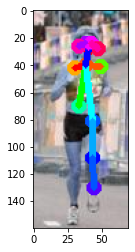

In [9]:
imgplot = plt.imshow(newImagen)
plt.show()

In [10]:
#3d
poseLifting = Prob3dPose('./tf_pose/lifting/models/prob_model_params.mat')
image_h, image_w = imagen.shape[:2]
standard_w = 640
standard_h = 480
pose_2d_mpiis = []
visibilities = []
pose_2d_mpii, visibility = common.MPIIPart.from_coco(humans[0])
pose_2d_mpiis.append([(int(x * standard_w + 0.5), int(y * standard_h + 0.5)) for x, y in pose_2d_mpii])
visibilities.append(visibility)
transformed_pose2d, weights = poseLifting.transform_joints(pose_2d_mpiis, visibilities)
#pose_3d = poseLifting.compute_3d(transformed_pose2d, weights)

AttributeError: 'list' object has no attribute 'ndim'

In [17]:
pose_2d_mpii.ndim

AttributeError: 'list' object has no attribute 'ndim'

In [35]:
linea

'64 60 86'

In [34]:
linea = str(images[0][0][0][0]) +" " + str(images[0][0][0][1]) + " "+ str(images[0][0][0][2])


In [26]:
f = open ("fichero.txt", "w")

In [36]:
f.write(str(images[0][0][0][0]) +" " + str(images[0][0][0][1]) + " "+ str(images[0][0][0][2]))

8

In [37]:
f.close()